# importing libraties

In [52]:
from keras import models
import os
from tqdm import tqdm
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools

# creating testing dataset

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
x=[]
y=[]
path='/content/drive/MyDrive/evaluating models/test/'
for ftype in os.listdir(path):
    for img in tqdm(os.listdir(path+ftype)):
        label=ftype
        path1 = os.path.join(path+ftype,img)
        img = cv2.imread(path1)
        x.append(np.array(img))
        y.append(str(label))

100%|██████████| 100/100 [00:01<00:00, 50.58it/s] 


# encoding data

In [30]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)
y=to_categorical(y,9)
x=np.array(x)

# Loading and visualizing  the basic model

In [27]:
model= models.load_model('/content/drive/MyDrive/evaluating models/base_model.h5')

In [32]:
model.summary()

Model: "functional_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 288, 432, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 286, 430, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 286, 430, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 286, 430, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 143, 215, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 141, 213, 64)     

# function for using confusion matrix

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Greens):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Evaluating the accuracy and loss of the basic model using testing dataset

In [31]:
model.evaluate(x,y)

29/29 [==============================] - 21s 705ms/step - loss: 2.4416 - accuracy: 0.8567


[2.441640615463257, 0.8566666841506958]

# Evaluating other metrics of the model

In [46]:
pred=np.argmax(model.predict(x),axis=1)
ytest=np.argmax(y,axis=1)

In [53]:
print(metrics.classification_report(ytest, pred, digits=9))

              precision    recall  f1-score   support

           0  0.932584270 0.830000000 0.878306878       100
           1  0.934579439 1.000000000 0.966183575       100
           2  0.897959184 0.880000000 0.888888889       100
           3  0.887500000 0.710000000 0.788888889       100
           4  0.712000000 0.890000000 0.791111111       100
           5  0.977528090 0.870000000 0.920634921       100
           6  0.890000000 0.890000000 0.890000000       100
           7  0.778761062 0.880000000 0.826291080       100
           8  0.767676768 0.760000000 0.763819095       100

    accuracy                      0.856666667       900
   macro avg  0.864287646 0.856666667 0.857124938       900
weighted avg  0.864287646 0.856666667 0.857124938       900



# Plotting the confusion_matrix

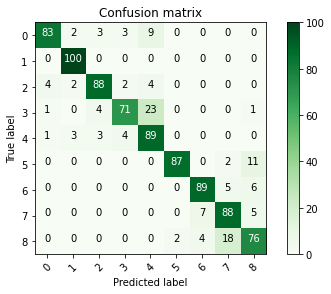

In [51]:
confusion_mtx = confusion_matrix(ytest, pred)
plot_confusion_matrix(confusion_mtx, classes = range(9))

# Loading and visualizing the Transfer learning model using testing dataset

In [54]:
tmodel= models.load_model('/content/drive/MyDrive/evaluating models/bestmodel.h5')

In [55]:
tmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 13, 512)        14714688  
                                                                 
 conv2d (Conv2D)             (None, 5, 9, 256)         3277056   
                                                                 
 batch_normalization (BatchN  (None, 5, 9, 256)        1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 5, 9, 256)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 7, 128)         295040    
                                                                 
 batch_normalization_1 (Batc  (None, 3, 7, 128)        512       
 hNormalization)                                        

# Evaluating the accuracy and loss of the transfer learning model using testing dataset

In [56]:
tmodel.evaluate(x,y)

29/29 [==============================] - 832s 29s/step - loss: 0.1424 - accuracy: 0.9489


[0.14238306879997253, 0.948888897895813]

# Evaluating other metrics of the model

In [57]:
pred=np.argmax(tmodel.predict(x),axis=1)
ytest=np.argmax(y,axis=1)

In [59]:
print(metrics.classification_report(ytest, pred, digits=9))

              precision    recall  f1-score   support

           0  0.979591837 0.960000000 0.969696970       100
           1  0.990000000 0.990000000 0.990000000       100
           2  0.909090909 1.000000000 0.952380952       100
           3  0.978021978 0.890000000 0.931937173       100
           4  0.970000000 0.970000000 0.970000000       100
           5  0.925233645 0.990000000 0.956521739       100
           6  0.912621359 0.940000000 0.926108374       100
           7  0.948979592 0.930000000 0.939393939       100
           8  0.935483871 0.870000000 0.901554404       100

    accuracy                      0.948888889       900
   macro avg  0.949891466 0.948888889 0.948621506       900
weighted avg  0.949891466 0.948888889 0.948621506       900



# Plotting the confusion_matrix

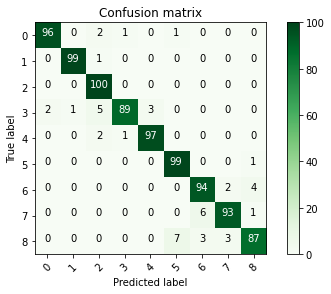

In [58]:
confusion_mtx = confusion_matrix(ytest, pred)
plot_confusion_matrix(confusion_mtx, classes = range(9))